In [89]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

# ODE 1

In [4]:
def f(x):
    return (-5*x**2+8*x+4)
def df(x):
    return (-10*x+8)
def ode(x,y):
    return (2*y-18*x)/(1+x)

In [5]:
def euler(x0,y0,h,N,f):
    ax=np.zeros(N)
    ay=np.zeros(N)
    ax[0]=x0
    ay[0]=y0
    for i in range(N-1):
        ax[i+1]=ax[i]+h
        ay[i+1]=ay[i]+h*f(ax[i],ay[i])
    return ax,ay


In [6]:
a_x,a_y=euler(0,4,0.05,60,ode)

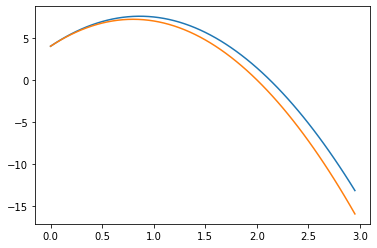

In [7]:
o_ax=np.arange(0,3,0.05)
o_ay=f(o_ax)
# print(oax)
# print(oay)
plt.plot(a_x,a_y)
plt.plot(o_ax,o_ay)

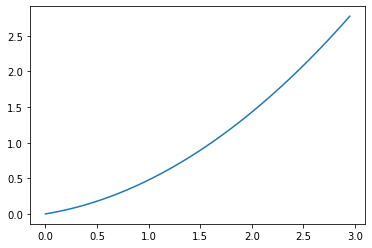

In [8]:
#error
err_E=abs(a_y-o_ay)
plt.plot(a_x,err_E)
#Do for different values of h

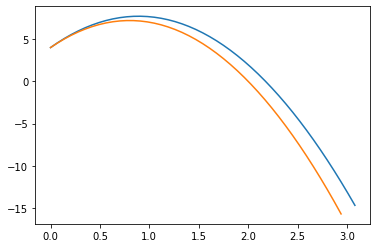

In [9]:
a_x,a_y=euler(0,4,0.07,45,ode)
oax=np.arange(0,3,0.07)
oay=f(oax)
# print(oax)
# print(oay)
plt.plot(a_x,a_y)#numerical
plt.plot(oax,oay)#analytical

# ODE 2(extra)

In [10]:
import math

In [11]:
# def f(x,th,u0):
#     return (x*math.tan(th)-((9.8*x**2)/(2*(u0*math.cos(th))**2)))
def dfp(x,th,u0):
    return (math.tan(th)-((9.8*x)/(u0*math.cos(th))**2))

In [12]:
u0=700
initialth=np.pi*20/180
ath=np.arange(20*np.pi/180,60*np.pi/180,5*np.pi/180)
def eulerp(x0,y0,h,df,th,N,u0):
    ax=np.zeros(N)
    ay=np.zeros(N)
    ax[0]=x0
    ay[0]=y0
    for i in range(N-1):
        ax[i+1]=ax[i]+h
        ay[i+1]=ay[i]+h*dfp(ax[i],th,u0)
        if(ay[i+1]<0):
            break
    return ax,ay

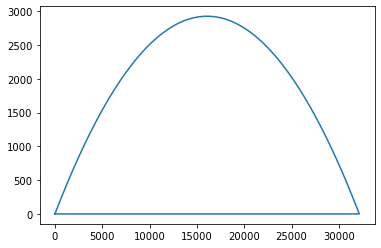

In [13]:
a_x,a_y=eulerp(0,0,0.5,df,initialth,1000000,u0)
plt.plot(a_x,a_y)

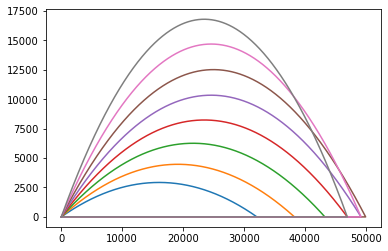

In [14]:
for i in ath:
    a_x,a_y=a_x,a_y=eulerp(0,0,0.5,df,i,1000000,u0)
    plt.plot(a_x,a_y)

# Coupled ODE 1

# A

In [15]:
def dp_dt(x,p):
    return -x
def dx_dt(x,p):
    return p

In [16]:
def eulerk(x0,p0,h,N):
    a_x=np.zeros(N)
    a_p=np.zeros(N)
    a_x[0]=x0
    a_p[0]=p0
    for i in range (N-1):
        a_x[i+1]=a_x[i]+h*(dx_dt(a_x[i],a_p[i]))
        a_p[i+1]=a_p[i]+h*(dp_dt(a_x[i],a_p[i]))
    return a_x,a_p


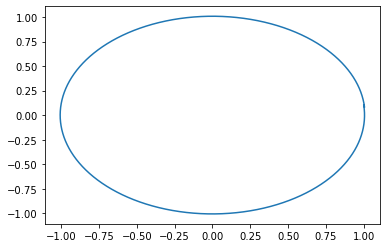

In [17]:
ax,ap=eulerk(1,0.1,0.001,6300)
plt.plot(ax,ap)

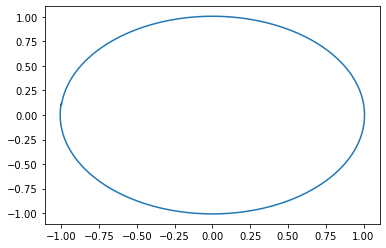

In [18]:
ax,ap=eulerk(-1,0.1,0.001,6300)
plt.plot(ax,ap)

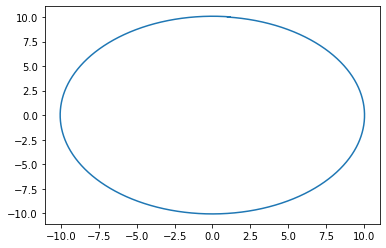

In [19]:
ax,ap=eulerk(1,10,0.001,6300)
plt.plot(ax,ap)

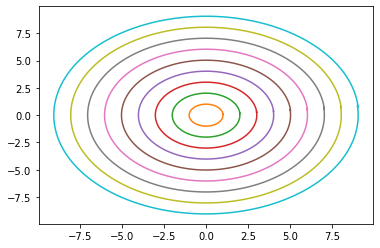

In [20]:
for i in range (10):
    manyx,manyp=eulerk(i*1,i*0.1,0.001,6300)
    plt.plot(manyx,manyp)

In [73]:
#generalized euler function for m coupled ode

def dFeu(Y):
    F=np.array((-Y[0],Y[1]))#m size array of fn of the form dF/dx
    return F
def EULERGEN(F,Y0,h,n,m):
    Y=np.zeros((n,m))
    Y[0]=Y0
    for i in range (1,n):
        Y[i]=Y[i-1]+h*(dF(Y[i-1]))
    return Y

In [131]:
Y0=np.array([1.0,0.1])
Y=EULERGEN(dFeu,Y0,0.01,6500,2)
# plt.plot(Y[:,1],Y[:,0])#

In [55]:
def eulerwitht(x0,p0,h,N):
    a_x=np.zeros(N)
    a_p=np.zeros(N)
    a_t=np.zeros(N)
    a_x[0]=x0
    a_p[0]=p0
    a_t[0]=0
    for i in range (N-1):
        a_x[i+1]=a_x[i]+h*(dx_dt(a_x[i],a_p[i]))
        a_p[i+1]=a_p[i]+h*(dp_dt(a_x[i],a_p[i]))
        a_t[i+1]=a_t[i]+h
    return a_x,a_p,a_t


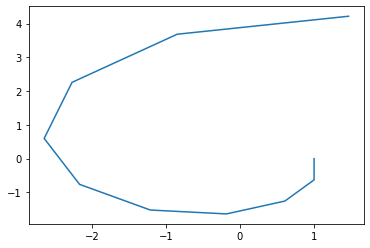

In [60]:
ax1,ap1,at1=eulerwitht(1,0,0.628,10)#T=2*pi
plt.plot(ax1,ap1)

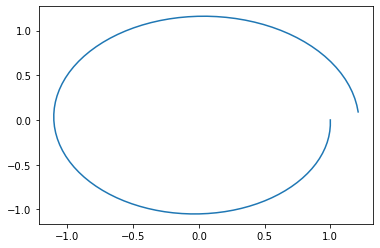

In [65]:
ax2,ap2,at2=eulerwitht(1,0,0.0628,100)#T=2*pi
plt.plot(ax2,ap2)

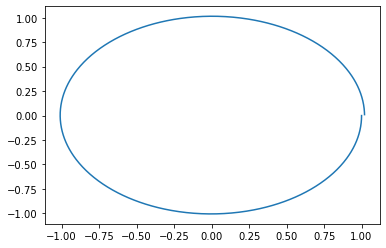

In [66]:
ax3,ap3,at3=eulerwitht(1,0,0.00628,1000)#T=2*pi
plt.plot(ax3,ap3)

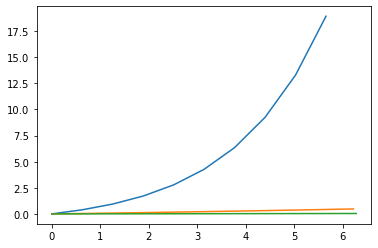

In [72]:
def Energy(x,p):
    return (x**(2)+p**(2))/2
Energy1=Energy(ax1,ap1)
plt.plot(at1,(Energy1-0.5)/0.5)#blue
Energy2=Energy(ax2,ap2)
plt.plot(at2,(Energy2-0.5)/0.5)#orange
Energy3=Energy(ax3,ap3)
plt.plot(at3,(Energy3-0.5)/0.5)#green

# B

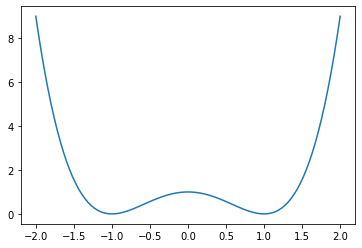

In [23]:
def V(x):
    return (x**2-1)**2
x=np.linspace(-2,2,100)
y=V(x)
plt.plot(x,y)

In [51]:
def ndp_dt(x,p):
    return -(4*x**3+4*x)
def ndx_dt(x,p):
    return p


def neulerk(x0,p0,h,N):
    a_x=np.zeros(N)
    a_p=np.zeros(N)
    a_x[0]=x0
    a_p[0]=p0
    for i in range (N-1):
        a_x[i+1]=a_x[i]+h*(ndx_dt(a_x[i],a_p[i]))
        a_p[i+1]=a_p[i]+h*(ndp_dt(a_x[i],a_p[i]))
    return a_x,a_p



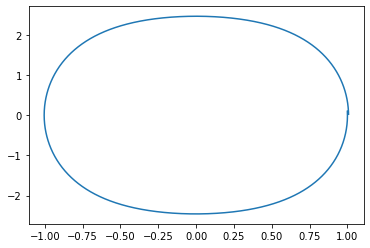

In [54]:
nax,nap=neulerk(1,0.1,0.001,2390)
plt.plot(nax,nap)

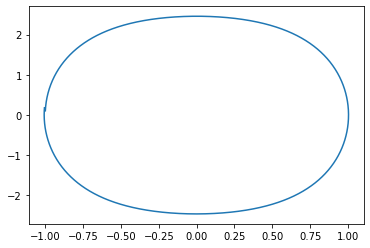

In [26]:
nax,nap=neulerk(-1,0.1,0.001,2390)
plt.plot(nax,nap)

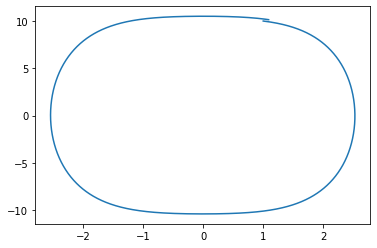

In [27]:
nax,nap=neulerk(1,10,0.001,1330)
plt.plot(nax,nap)

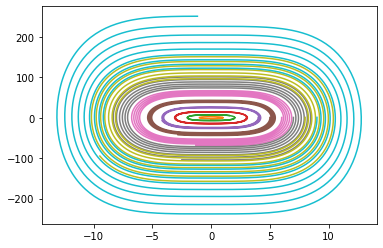

In [28]:
for i in range (10):
    nmanyx,nmanyp=neulerk(i*1,i*0.1,0.001,3000)
    plt.plot(nmanyx,nmanyp)

# RK-2nd Order

In [29]:
def dydx(x,y):
    return (2*y-18*x)/(1+x)
def f(x):
    return (-5*x**2+8*x+4)
def RK2(f,x0,y0,h,N):
    x=np.zeros(N)
    x[0]=x0
    y=np.zeros(N)
    y[0]=y0
    for i in range(1,N):
        k1=f(x[i-1],y[i-1])
        k2=f(x[i-1]+h,y[i-1]+h*k1)
        y[i]=y[i-1]+(h/2)*(k1+k2)
        x[i]=x[i-1]+h
        
    return x,y


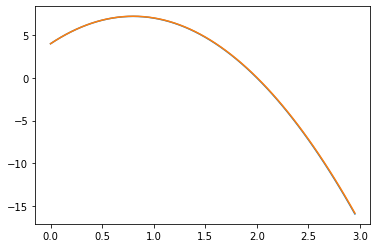

In [30]:
ansx,ansy=RK2(dydx,0,4,0.05,60)
anal_x=np.arange(0,3,0.05)
anal_y=f(ansx)
plt.plot(anal_x,anal_y)
plt.plot(ansx,ansy)


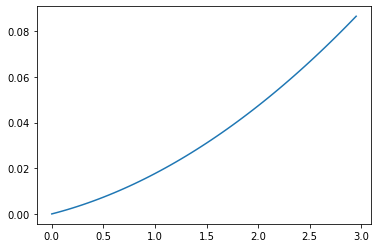

In [31]:
abser=abs(ansy-anal_y)
plt.plot(ansx,abser)

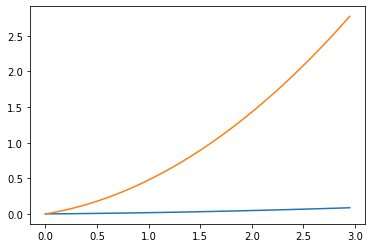

In [32]:
plt.plot(ansx,abser)
plt.plot(o_ax,err_E)

# Coupled ODE 2

In [33]:
def dydx(x,y,z):
    return -x-y*z
def dzdx(x,y,z):
    return -y-x*z 

In [34]:
def RuKu2(x0,y0,z0,h,N):
    x=np.zeros(N)
    x[0]=x0
    y=np.zeros(N)
    y[0]=y0
    z=np.zeros(N)
    z[0]=z0
    for i in range (1,N):
        sy1=dydx(x[i-1],y[i-1],z[i-1])
        sy2=dydx(x[i-1]+(h/2),y[i-1]+(h/2)*sy1,z[i-1])
        
        sz1=dzdx(x[i-1],y[i-1],z[i-1])
        sz2=dzdx(x[i-1]+(h/2),y[i-1],z[i-1]+(h/2)*sz1)
        
        y[i]=y[i-1]+h*(sy2)
        z[i]=z[i-1]+h*(sz2)
        x[i]=x[i-1]+h
    return x,y,z
# print(np.linspace(1,10,3))


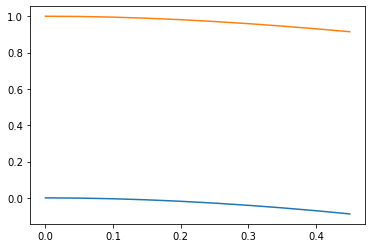

In [35]:
ax,ay,az=RuKu2(0,0,1,0.05,10)
plt.plot(ax,ay)
plt.plot(ax,az)

In [82]:
#generalized rk function for M coupled ode

def dFrk(x,Y):
    F=np.array([-x-Y[0]*Y[1],-Y[0]-x*Y[1]])
    return F

def RK2GENERAL(dFrk,X0,Y0,h,n,m):
    X=np.zeros(n)
    Y=np.zeros((n,m))
    X[0]=X0
    Y[0]=Y0
    for i in range (1,n):
        
        S1=dFrk(X[i-1],Y[i-1])
        S2=dFrk(X[i-1]+h/2,Y[i-1]+(h/2)*S1)
        
        Y[i]=Y[i-1]+h*S2
        X[i]=X[i-1]+h
    return X,Y


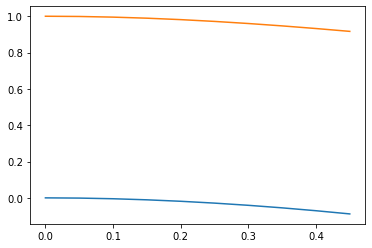

In [87]:
Y0=np.array([0,1])
AX,AY=RK2GENERAL(dFrk,0,Y0,0.05,10,2)
plt.plot(AX,AY[ :, 0])#orange
plt.plot(AX,AY[ :, 1])#blue

# Coupled ode 4

# Case A

In [111]:
# E=[0,0,0]
# B=[0,0,10**(-4)]

#The coupled differential equations

def dvx_dt1(vx1,vy1,vz1):
    return -1.75*(10**7)*vy1
def dvy_dt1(vx1,vy1,vz1):
    return 1.75*(10**7)*vx1
def dvz_dt1(vx1,vy1,vz1):
    return 0

In [115]:
#We get the velocities as a function of time from here

def solve(vx0,vy0,vz0,h,n):
    vx1=np.zeros(n)
    vy1=np.zeros(n)
    vz1=np.zeros(n)
    t1=np.zeros(n)
    vx1[0]=vx0
    vy1[0]=vy0
    vz1[0]=vz0
    t1[0]=0
    
    for i in range(1,n):
        svx1=dvx_dt1(vx1[i-1],vy1[i-1],vz1[i-1])
        svy1=dvy_dt1(vx1[i-1],vy1[i-1],vz1[i-1])
        svz1=dvz_dt1(vx1[i-1],vy1[i-1],vz1[i-1])
        
        svx2=dvx_dt1(vx1[i-1]+(h/2)*svx1,vy1[i-1]+(h/2)*svy1,vz1[i-1]+(h/2)*svz1)
        svy2=dvy_dt1(vx1[i-1]+(h/2)*svx1,vy1[i-1]+(h/2)*svy1,vz1[i-1]+(h/2)*svz1)
        svz2=dvz_dt1(vx1[i-1]+(h/2)*svx1,vy1[i-1]+(h/2)*svy1,vz1[i-1]+(h/2)*svz1)
        
        vx1[i]=vx1[i-1]+h*(svx2)
        vy1[i]=vy1[i-1]+h*(svy2)
        vz1[i]=vz1[i-1]+h*(svz2)
        t1[i]=t1[i-1]+h
        
    return t1,vx1,vy1,vz1

In [116]:
#Position from the velocities

def pos(vx1,vy1,vz1,n):
    x1=np.zeros(n)
    y1=np.zeros(n)
    z1=np.zeros(n)
    x1[0]=vx1[0]
    y1[0]=vy1[0]
    z1[0]=vz1[0]
    
    for i in range(1,n):
        x1[i]=x1[i-1]+vx1[i]
        y1[i]=y1[i-1]+vy1[i]
        z1[i]=z1[i-1]+vz1[i]
        
    return x1*(10**(-9)),y1*(10**(-9)),z1*(10**(-9))

In [117]:
#Velocities as a function of time
t1,vx1,vy1,vz1=solve(1,1,1,10**(-9),2000)

In [118]:
#Positions as a function of time
x1,y1,z1=pos(vx1,vy1,vz1,1000)

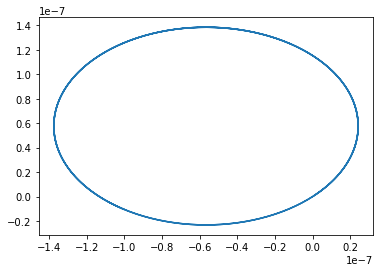

In [119]:
plt.plot(x1,y1)# For x and y

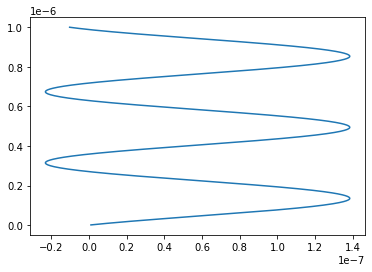

In [121]:
plt.plot(y1,z1) #for Y and Z

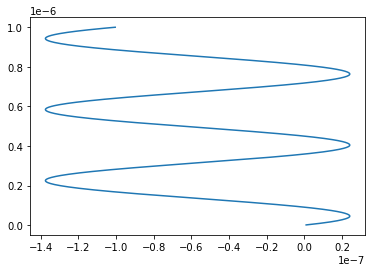

In [122]:
plt.plot(x1,z1) #for X and Z

# Case B 

In [123]:
# Ehash=[0,1,0]
# Bhash=[0,0,10**(-4)]

# The coupled differential equations

def dvx_dt2(vx2,vy2,vz2):
    return -1.75*(10**7)*vy2

def dvy_dt2(vx2,vy2,vz2):
    return 1.75*(10**7)*vx2-(1.75*(10**(11)))

def dvz_dt2(vx2,vy2,vz2):
    return 0


In [124]:
# We get the velocities as a function of time from here

def solve(vx0,vy0,vz0,h,n):
    vx2=np.zeros(n)
    vy2=np.zeros(n)
    vz2=np.zeros(n)
    t2=np.zeros(n)
    vx2[0]=vx0
    vy2[0]=vy0
    vz2[0]=vz0
    t2[0]=0
    
    for i in range(1,n):
        svx1=dvx_dt2(vx2[i-1],vy2[i-1],vz2[i-1])
        svy1=dvy_dt2(vx2[i-1],vy2[i-1],vz2[i-1])
        svz1=dvz_dt2(vx2[i-1],vy2[i-1],vz2[i-1])
        
        svx2=dvx_dt2(vx2[i-1]+(h/2)*svx1,vy2[i-1]+(h/2)*svy1,vz2[i-1]+(h/2)*svz1)
        svy2=dvy_dt2(vx2[i-1]+(h/2)*svx1,vy2[i-1]+(h/2)*svy1,vz2[i-1]+(h/2)*svz1)
        svz2=dvz_dt2(vx2[i-1]+(h/2)*svx1,vy2[i-1]+(h/2)*svy1,vz2[i-1]+(h/2)*svz1)
        
        vx2[i]=vx2[i-1]+h*(svx2)
        vy2[i]=vy2[i-1]+h*(svy2)
        vz2[i]=vz2[i-1]+h*(svz2)
        t2[i]=t2[i-1]+h
        
    return t2,vx2,vy2,vz2

In [125]:
# Position from the velocities

def pos(vx2,vy2,vz2,n):
    x2=np.zeros(n)
    y2=np.zeros(n)
    z2=np.zeros(n)
    x2[0]=vx2[0]
    y2[0]=vy2[0]
    z2[0]=vz2[0]
    
    for i in range(1,n):
        x2[i]=x2[i-1]+vx2[i]
        y2[i]=y2[i-1]+vy2[i]
        z2[i]=z2[i-1]+vz2[i]
        
    return x2*(10**(-9)),y2*(10**(-9)),z2*(10**(-9))

In [126]:
# Velocities as a function of time
t2,vx2,vy2,vz2=solve(1,1,1,10**(-9),2000)

In [127]:
# Positions as a function of time
x2,y2,z2=pos(vx2,vy2,vz2,1000)

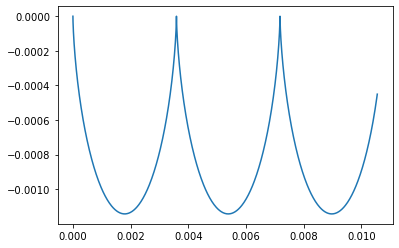

In [128]:
plt.plot(x2,y2)# for x and y

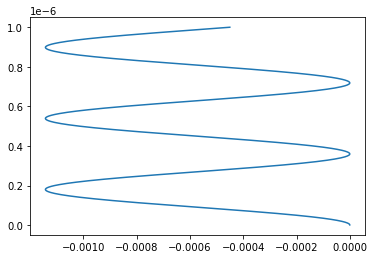

In [129]:
plt.plot(y2,z2)# for y and z

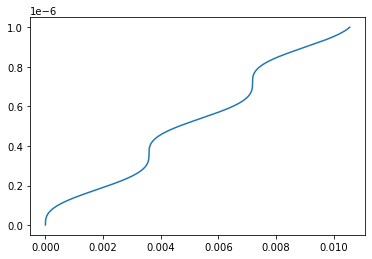

In [130]:
plt.plot(x2,z2)# for x and z